<a href="https://colab.research.google.com/github/yagel2/TDS_NYC_Airbnb/blob/main/TDS_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 2**

Loading and Exploring the Dataset

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/AB_NYC_2019.csv')


**Visualization 1: Distribution of apartment locations**

We chose this visualization because it shows that the closer you get to the city center, the significantly greater the number of apartments.

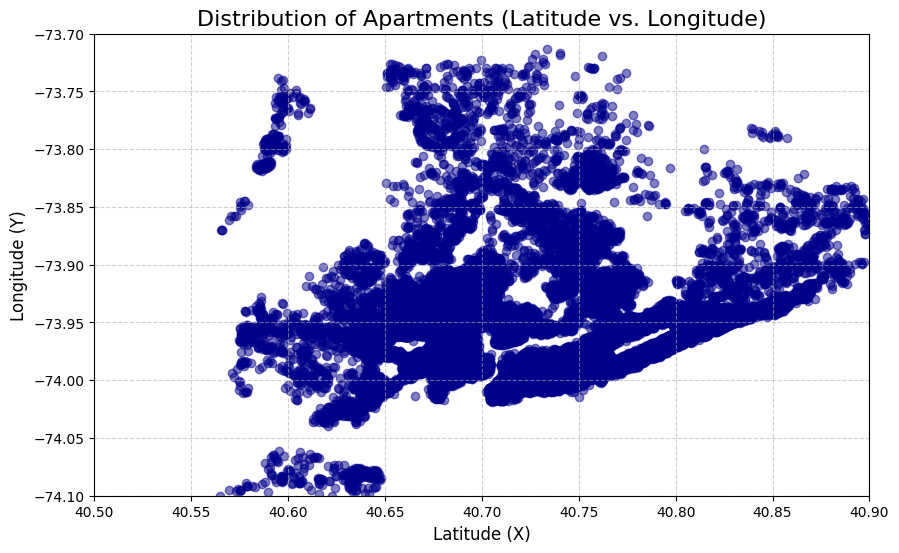

In [72]:
filtered_df = df[(df['latitude'] >= 40.5) & (df['latitude'] <= 40.9) & (df['longitude'] >= -74.1) & (df['longitude'] <= -73.7)]

# 2D scatter plot for latitude and longitude distribution
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['latitude'], filtered_df['longitude'], alpha=0.5, color='darkblue')

# Customize the plot
plt.title('Distribution of Apartments (Latitude vs. Longitude)', fontsize=16)
plt.xlabel('Latitude (X)', fontsize=12)
plt.ylabel('Longitude (Y)', fontsize=12)
plt.xlim(40.5, 40.9)  # Set X-axis range
plt.ylim(-74.1, -73.7)  # Set Y-axis range
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Visualization 2: Relationship between apartment rent and distance from the city center**

We chose this visualization because it shows the rent curve, so the further you get from the city center, the lower the apartment rent.

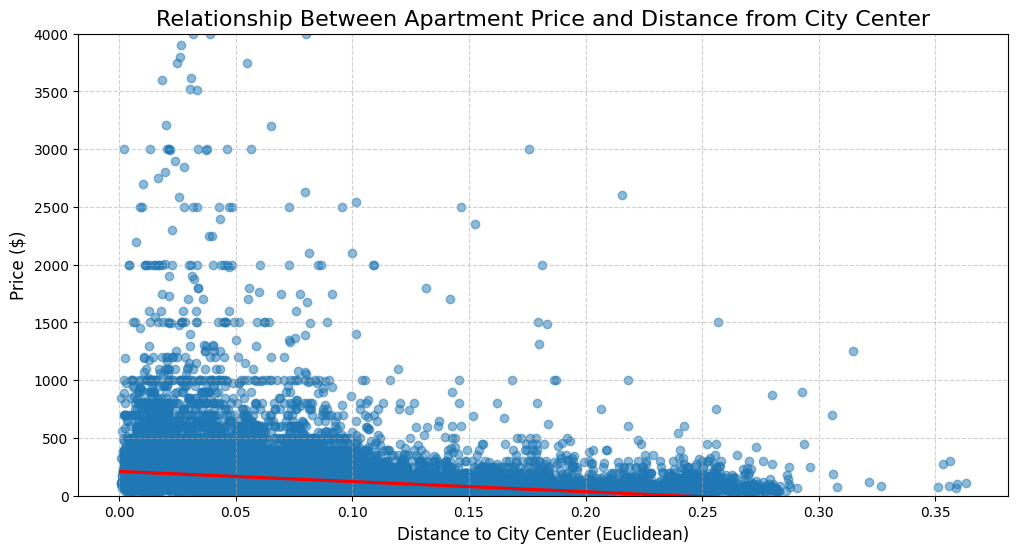

In [73]:
# Define the city center coordinates (Times Square)
city_center_lat = 40.7580
city_center_lon = -73.9855

# Calculate Euclidean distance to the city center
df['distance_to_center'] = np.sqrt(
    (df['latitude'] - city_center_lat)**2 + (df['longitude'] - city_center_lon)**2
)
filtered_df = df[(df['price'] > 0) & (df['price'] <= 4000)]

# Plot scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(x='distance_to_center', y='price', data=filtered_df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Customize the plot
plt.title('Relationship Between Apartment Price and Distance from City Center', fontsize=16)
plt.xlabel('Distance to City Center (Euclidean)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.ylim(0, 4000)  # Set y-axis limit to 0-4000
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Visualization 3: Average Apartment Price by Neighbourhood Group**

In this visualization, you can see the breakdown of rental prices in the 5 neighborhoods in the city, and from this you can probably also deduce the population in the neighborhoods.

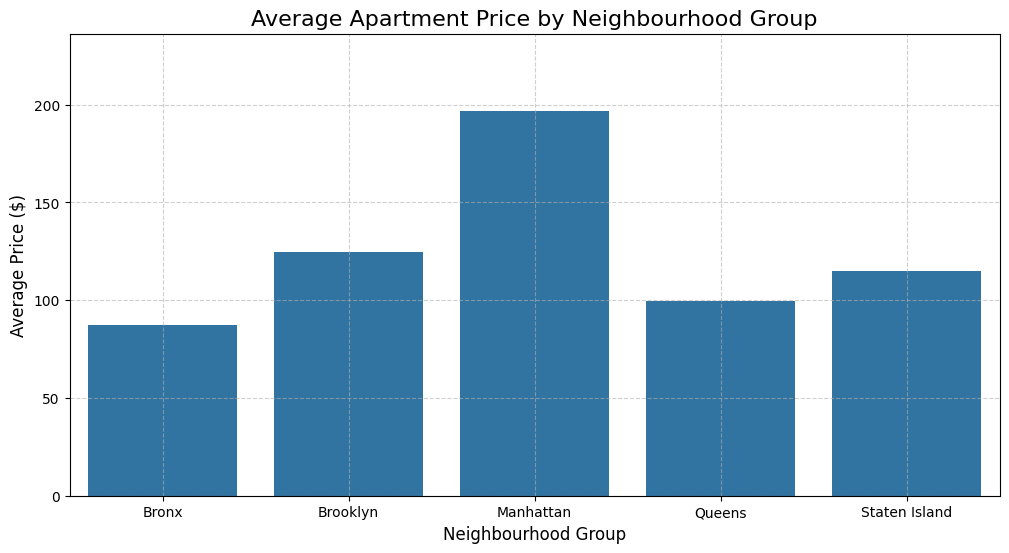

In [74]:
# Group the data by neighbourhood group and calculate average price
neighbourhood_group_stats = df.groupby('neighbourhood_group').agg(
    avg_price=('price', 'mean')
).reset_index()

# Plot the average price as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='neighbourhood_group',
    y='avg_price',
    data=neighbourhood_group_stats
)

# Customize the plot
plt.title('Average Apartment Price by Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.ylim(0, neighbourhood_group_stats['avg_price'].max() * 1.2)  # Set y-axis limit
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Visualization 4:**

Why we choose..

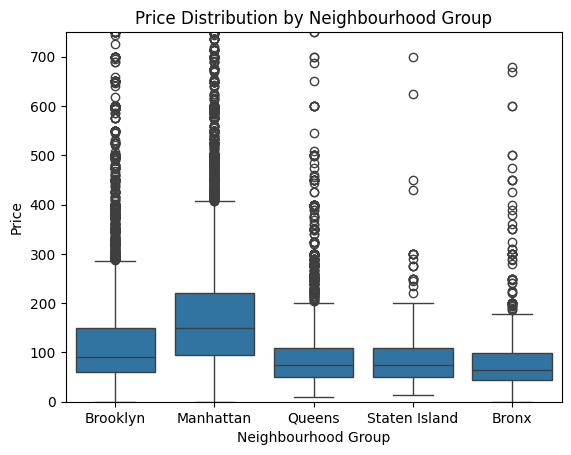

In [75]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.ylim(0, 750)
plt.show()

**Visualization 5:**

Why we choose..

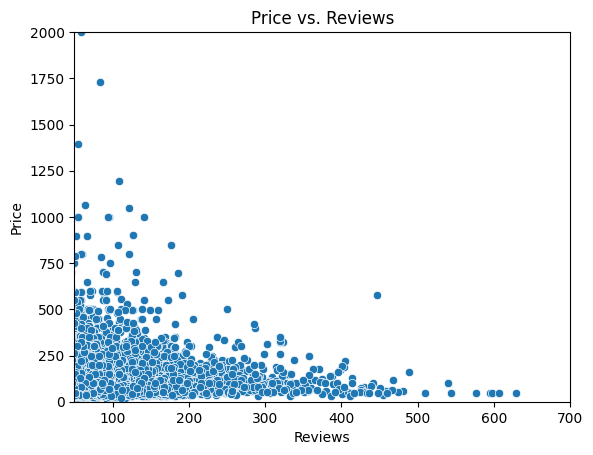

In [76]:
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title('Price vs. Reviews')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.xlim(50, 700)
plt.ylim(0, 2000)
plt.show()

**Part 3**

Data Preprocessing: Handling Missing Values, One-Hot Encoding, and Feature Selection

In [77]:
# Fill missing values in 'reviews_per_month' by reassigning the column directly
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Drop rows with missing values in the 'price' column
df = df.dropna(subset=['price'])

# One-hot encoding
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Feature matrix (X) and target vector (y)
X = df[['minimum_nights', 'number_of_reviews', 'reviews_per_month',
        'availability_365', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Queens',
        'room_type_Private room', 'room_type_Shared room']]
y = df['price']

Splitting the Data

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building the Regression Model

In [79]:
from xgboost import XGBRegressor

# Initialize the model with default hyperparameters
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

Evaluating the Model

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 71.35013623645499
Mean Squared Error (MSE): 48278.37802410781
R² Score: -0.09132671356201172


**Part 4**